In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/01_Jan.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,13.500000,77.000000,1,1,0,1549.0,1613.0,1699.0,1511.0,1495.0,1376.0,124.166667,1490.0
1,13.441667,78.083333,1,1,0,1521.0,1629.0,1662.0,1487.0,1454.0,1248.0,245.333333,1454.0
2,13.383333,79.166667,1,1,0,1526.0,1618.0,1644.0,1476.0,1429.0,1205.0,366.250000,1451.0
3,13.325000,80.250000,1,1,0,1519.0,1588.0,1621.0,1450.0,1271.0,1183.0,483.416667,1406.0
4,13.266667,81.333333,2,1,0,1490.0,1549.0,1613.0,1420.0,1282.0,1150.0,601.250000,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,11.412452,84.203770,23,4,1,1925.0,1956.0,2072.0,1832.0,1849.0,1620.0,1936.500000,1787.0
8636,11.412452,84.203770,24,4,1,1904.0,1948.0,2046.0,1793.0,1817.0,1587.0,1913.833333,1774.0
8637,11.412452,84.203770,24,4,1,1877.0,1947.0,2016.0,1730.0,1771.0,1562.0,1891.416667,1747.0
8638,11.312452,84.203770,24,4,1,1871.0,1977.0,1984.0,1702.0,1716.0,1517.0,1867.833333,1701.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4800][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.831098,-0.049353,0.367890,-1.660674,-1.479804,-1.332948,-0.597107,-0.343274,-0.002302,-0.739603,-0.796414,-1.254077,-6.449795
1,-0.973338,-0.065047,0.433143,-1.660674,-1.479804,-1.332948,-0.707701,-0.280084,-0.148421,-0.835649,-0.959195,-1.759263,-5.953322
2,-0.985191,-0.080741,0.498395,-1.660674,-1.479804,-1.332948,-0.687952,-0.323527,-0.219506,-0.879671,-1.058451,-1.928974,-5.457873
3,-1.162992,-0.096435,0.563647,-1.660674,-1.479804,-1.332948,-0.715601,-0.442007,-0.310337,-0.983721,-1.685753,-2.015803,-4.977789
4,-1.131383,-0.112128,0.628900,-1.516238,-1.479804,-1.332948,-0.830144,-0.596031,-0.341930,-1.103778,-1.642080,-2.146047,-4.494974


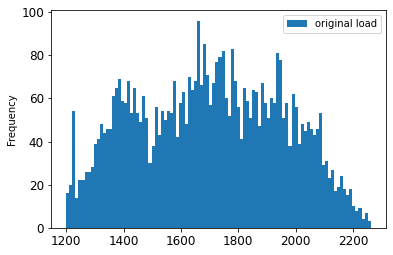

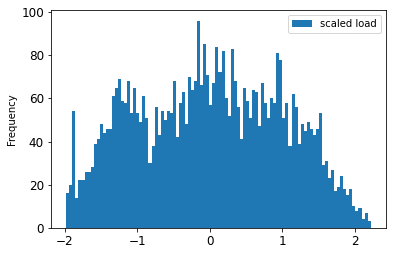

In [9]:
stlf_data[stlf_data.index <= 4800][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4800][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

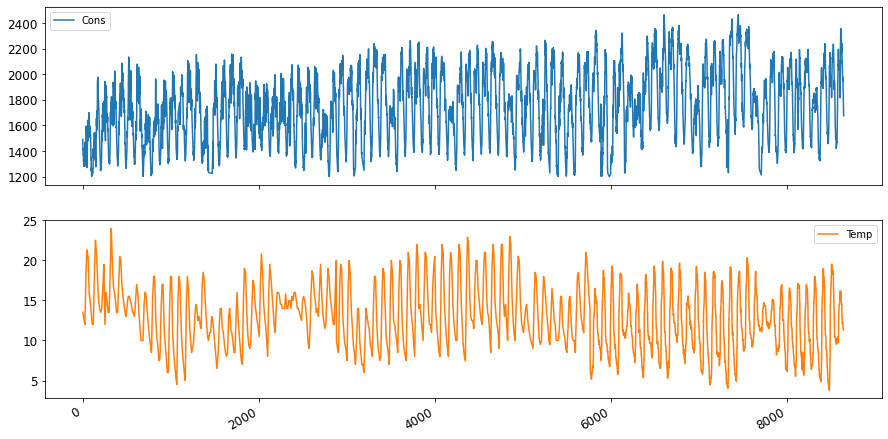

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-0.831098,-0.049353,0.367890,-1.660674,-1.479804,-1.332948,-0.597107,-0.343274,-0.002302,-0.739603,-0.796414,-1.254077,-6.449795,-0.973338
1,-0.973338,-0.065047,0.433143,-1.660674,-1.479804,-1.332948,-0.707701,-0.280084,-0.148421,-0.835649,-0.959195,-1.759263,-5.953322,-0.985191
2,-0.985191,-0.080741,0.498395,-1.660674,-1.479804,-1.332948,-0.687952,-0.323527,-0.219506,-0.879671,-1.058451,-1.928974,-5.457873,-1.162992
3,-1.162992,-0.096435,0.563647,-1.660674,-1.479804,-1.332948,-0.715601,-0.442007,-0.310337,-0.983721,-1.685753,-2.015803,-4.977789,-1.131383
4,-1.131383,-0.112128,0.628900,-1.516238,-1.479804,-1.332948,-0.830144,-0.596031,-0.341930,-1.103778,-1.642080,-2.146047,-4.494974,-1.293379
5,-1.293379,-0.127822,0.694152,-1.516238,-1.479804,-1.332948,-0.972336,-0.706612,-0.278744,-1.299872,-1.364162,-2.126313,-4.026158,-1.289428
6,-1.289428,-0.143516,0.759404,-1.516238,-1.479804,-1.332948,-0.984185,-0.686865,-0.322185,-1.415928,-1.399894,-2.023697,-3.557001,-1.360548
7,-1.360548,-0.159210,0.824657,-1.516238,-1.479804,-1.332948,-1.161925,-0.714511,-0.440660,-1.515976,-1.471359,-2.153940,-3.093990,-1.431668
8,-1.431668,-0.174904,0.889909,-1.371801,-1.479804,-1.332948,-1.130327,-0.829041,-0.594678,-1.423932,-1.542824,-2.161834,-2.637126,-1.498837
9,-1.498837,-0.190598,0.955162,-1.371801,-1.479804,-1.332948,-1.292268,-0.971217,-0.705254,-1.503971,-1.586497,-1.561925,-2.186066,-1.463277


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.831098,-0.049353,0.367890,-1.660674,-1.479804,-1.332948,-0.597107,-0.343274,-0.002302,-0.739603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.831098
1,-0.973338,-0.065047,0.433143,-1.660674,-1.479804,-1.332948,-0.707701,-0.280084,-0.148421,-0.835649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.831098,-0.973338
2,-0.985191,-0.080741,0.498395,-1.660674,-1.479804,-1.332948,-0.687952,-0.323527,-0.219506,-0.879671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.831098,-0.973338,-0.985191
3,-1.162992,-0.096435,0.563647,-1.660674,-1.479804,-1.332948,-0.715601,-0.442007,-0.310337,-0.983721,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.831098,-0.973338,-0.985191,-1.162992
4,-1.131383,-0.112128,0.628900,-1.516238,-1.479804,-1.332948,-0.830144,-0.596031,-0.341930,-1.103778,...,NaN,NaN,NaN,NaN,NaN,-0.831098,-0.973338,-0.985191,-1.162992,-1.131383
5,-1.293379,-0.127822,0.694152,-1.516238,-1.479804,-1.332948,-0.972336,-0.706612,-0.278744,-1.299872,...,NaN,NaN,NaN,NaN,-0.831098,-0.973338,-0.985191,-1.162992,-1.131383,-1.293379
6,-1.289428,-0.143516,0.759404,-1.516238,-1.479804,-1.332948,-0.984185,-0.686865,-0.322185,-1.415928,...,NaN,NaN,NaN,-0.831098,-0.973338,-0.985191,-1.162992,-1.131383,-1.293379,-1.289428
7,-1.360548,-0.159210,0.824657,-1.516238,-1.479804,-1.332948,-1.161925,-0.714511,-0.440660,-1.515976,...,NaN,NaN,-0.831098,-0.973338,-0.985191,-1.162992,-1.131383,-1.293379,-1.289428,-1.360548
8,-1.431668,-0.174904,0.889909,-1.371801,-1.479804,-1.332948,-1.130327,-0.829041,-0.594678,-1.423932,...,NaN,-0.831098,-0.973338,-0.985191,-1.162992,-1.131383,-1.293379,-1.289428,-1.360548,-1.431668
9,-1.498837,-0.190598,0.955162,-1.371801,-1.479804,-1.332948,-1.292268,-0.971217,-0.705254,-1.503971,...,-0.831098,-0.973338,-0.985191,-1.162992,-1.131383,-1.293379,-1.289428,-1.360548,-1.431668,-1.498837


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.463277,-0.206292,1.020414,-1.371801,-1.479804,-1.332948,-1.288318,-0.983065,-0.685509,-1.483961,...,-0.973338,-0.985191,-1.162992,-1.131383,-1.293379,-1.289428,-1.360548,-1.431668,-1.498837,-1.463277
11,-1.534397,-0.221986,1.085666,-1.371801,-1.479804,-1.332948,-1.359414,-1.160785,-0.713153,-1.576005,...,-0.985191,-1.162992,-1.131383,-1.293379,-1.289428,-1.360548,-1.431668,-1.498837,-1.463277,-1.534397
12,-1.601566,-0.237680,1.150919,-1.227365,-1.479804,-1.332948,-1.430510,-1.129191,-0.827679,-1.628030,...,-1.162992,-1.131383,-1.293379,-1.289428,-1.360548,-1.431668,-1.498837,-1.463277,-1.534397,-1.601566
13,-1.648980,-0.255616,1.140880,-1.227365,-1.479804,-1.332948,-1.497656,-1.291113,-0.969849,-1.720074,...,-1.131383,-1.293379,-1.289428,-1.360548,-1.431668,-1.498837,-1.463277,-1.534397,-1.601566,-1.648980
14,-1.621322,-0.273552,1.130841,-1.227365,-1.479804,-1.332948,-1.462108,-1.287164,-0.981697,-1.555996,...,-1.293379,-1.289428,-1.360548,-1.431668,-1.498837,-1.463277,-1.534397,-1.601566,-1.648980,-1.621322


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4790 entries, 10 to 4799
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4790 non-null   float64
 1   Temp           4790 non-null   float64
 2   Hum            4790 non-null   float64
 3   A              4790 non-null   float64
 4   B              4790 non-null   float64
 5   C              4790 non-null   float64
 6   D              4790 non-null   float64
 7   E              4790 non-null   float64
 8   F              4790 non-null   float64
 9   G              4790 non-null   float64
 10  H              4790 non-null   float64
 11  I              4790 non-null   float64
 12  J              4790 non-null   float64
 13  y_t+1          4790 non-null   float64
 14  Cons_t-10      4790 non-null   float64
 15  Cons_t-9       4790 non-null   float64
 16  Cons_t-8       4790 non-null   float64
 17  Cons_t-7       4790 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,-1.534397
11,-1.601566
12,-1.648980
13,-1.621322
14,-1.645029
...,...
4795,-0.206820
4796,-0.222625
4797,-0.139651
4798,-0.246332


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.463277,-1.463277,-1.498837,-1.431668,-1.360548,-1.289428,-1.293379,-1.131383,-1.162992,-0.985191,...,-1.371801,-1.479804,-1.332948,-1.288318,-0.983065,-0.685509,-1.483961,-1.665902,-1.727689,-1.731933
11,-1.534397,-1.534397,-1.463277,-1.498837,-1.431668,-1.360548,-1.289428,-1.293379,-1.131383,-1.162992,...,-1.371801,-1.479804,-1.332948,-1.359414,-1.160785,-0.713153,-1.576005,-2.455985,-1.731636,-1.283946
12,-1.601566,-1.601566,-1.534397,-1.463277,-1.498837,-1.431668,-1.360548,-1.289428,-1.293379,-1.131383,...,-1.227365,-1.479804,-1.332948,-1.430510,-1.129191,-0.827679,-1.628030,-2.428193,-1.743476,-1.350529
13,-1.648980,-1.648980,-1.601566,-1.534397,-1.463277,-1.498837,-1.431668,-1.360548,-1.289428,-1.293379,...,-1.227365,-1.479804,-1.332948,-1.497656,-1.291113,-0.969849,-1.720074,-2.225710,-1.731636,-1.408918
14,-1.621322,-1.621322,-1.648980,-1.601566,-1.534397,-1.463277,-1.498837,-1.431668,-1.360548,-1.289428,...,-1.227365,-1.479804,-1.332948,-1.462108,-1.287164,-0.981697,-1.555996,-2.237620,-1.778997,-1.463892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.136927,0.136927,0.144829,0.030247,0.144829,0.318679,0.318679,0.085563,0.030247,0.101367,...,1.516930,1.520424,-1.332948,0.319241,0.103001,0.830974,0.164831,0.227915,0.052305,0.235522
4796,-0.206820,-0.206820,0.136927,0.144829,0.030247,0.144829,0.318679,0.318679,0.085563,0.030247,...,1.661366,1.520424,-1.332948,0.145451,0.031913,0.645363,-0.011253,0.005580,-0.105566,0.162110
4797,-0.222625,-0.222625,-0.206820,0.136927,0.144829,0.030247,0.144829,0.318679,0.318679,0.085563,...,1.661366,1.520424,-1.332948,0.030907,0.087204,0.467650,-0.223355,-0.093677,-0.164768,0.102697
4798,-0.139651,-0.139651,-0.222625,-0.206820,0.136927,0.144829,0.030247,0.144829,0.318679,0.318679,...,1.661366,1.520424,-1.332948,0.145451,0.320214,0.210954,-0.131311,-0.014271,-0.184501,0.072649


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4790, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4790,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4801) & (stlf_data.index <5761)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,1561.0,14.291667,56.333333,1.0,1.0,0.0,1644.0,1708.0,1722.0,1562.000000,1579.0,1543.0,1685.500000
4802,1533.0,14.083333,57.666667,1.0,1.0,0.0,1665.0,1737.0,1781.0,1551.000000,1558.0,1526.0,1664.833333
4803,1521.0,13.875000,59.000000,1.0,1.0,0.0,1638.0,1735.0,1781.0,1551.000000,1540.0,1514.0,1643.166667
4804,1505.0,13.666667,60.333333,2.0,1.0,0.0,1591.0,1648.0,1737.0,1525.000000,1509.0,1476.0,1623.833333
4805,1467.0,13.458333,61.666667,2.0,1.0,0.0,1561.0,1644.0,1708.0,1500.000000,1483.0,1461.0,1603.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,1700.0,14.409091,66.181818,24.0,3.0,1.0,1785.0,1741.0,1875.0,1629.333333,1530.0,1681.0,1778.000000
5757,1656.0,14.272727,66.454545,24.0,3.0,1.0,1779.0,1753.0,1861.0,1621.500000,1512.0,1638.0,1760.916667
5758,1644.0,14.136364,66.727273,24.0,3.0,1.0,1775.0,1813.0,1788.0,1613.666667,1487.0,1615.0,1748.916667
5759,1617.0,14.000000,67.000000,24.0,3.0,1.0,1747.0,1813.0,1781.0,1605.833333,1471.0,1591.0,1735.250000


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-0.631530,0.229945,-1.199552,-1.661325,-1.226741,-1.527525,-0.332980,-0.101962,-0.051255,-0.626593,-0.621200,-0.843778,-0.192494
4802,-0.732333,0.166830,-1.109219,-1.661325,-1.226741,-1.527525,-0.257390,0.002401,0.161075,-0.666190,-0.696956,-0.905348,-0.270676
4803,-0.775535,0.103714,-1.018886,-1.661325,-1.226741,-1.527525,-0.354577,-0.004796,0.161075,-0.666190,-0.761890,-0.948809,-0.352640
4804,-0.833137,0.040598,-0.928553,-1.516862,-1.226741,-1.527525,-0.523754,-0.317887,0.002727,-0.759783,-0.873720,-1.086436,-0.425778
4805,-0.969941,-0.022517,-0.838220,-1.516862,-1.226741,-1.527525,-0.631740,-0.332282,-0.101638,-0.849776,-0.967513,-1.140763,-0.501752
4806,-0.977141,-0.085633,-0.747887,-1.516862,-1.226741,-1.527525,-0.732527,-0.256708,0.002727,-0.943369,-0.999980,-1.195089,-0.587499
4807,-0.980742,-0.148749,-0.657554,-1.516862,-1.226741,-1.527525,-0.775721,-0.353874,-0.004470,-1.011764,-1.054092,-1.166115,-0.672932
4808,-1.088745,-0.211864,-0.567221,-1.372399,-1.226741,-1.527525,-0.833313,-0.523015,-0.317567,-1.090957,-1.079344,-1.220441,-0.740395
4809,-1.142747,-0.274980,-0.476888,-1.372399,-1.226741,-1.527525,-0.970095,-0.630978,-0.331962,-1.126955,-1.137063,-1.274768,-0.811325
4810,-1.178748,-0.338096,-0.386556,-1.372399,-1.226741,-1.527525,-0.977294,-0.731742,-0.256387,-1.256545,-1.205604,-1.274768,-0.892029


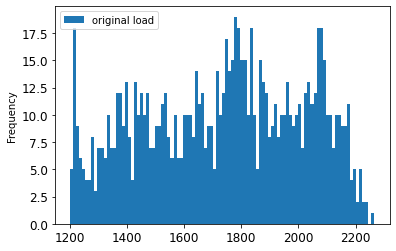

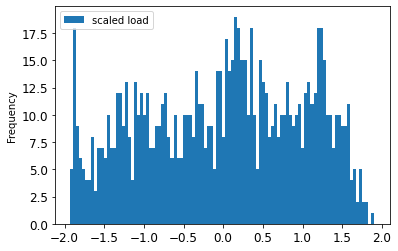

In [21]:
stlf_data[(stlf_data.index >=4801) & (stlf_data.index <=5761)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4801) & (valid.index <=5761)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4801,-0.631530,0.229945,-1.199552,-1.661325,-1.226741,-1.527525,-0.332980,-0.101962,-0.051255,-0.626593,-0.621200,-0.843778,-0.192494,-0.732333
4802,-0.732333,0.166830,-1.109219,-1.661325,-1.226741,-1.527525,-0.257390,0.002401,0.161075,-0.666190,-0.696956,-0.905348,-0.270676,-0.775535
4803,-0.775535,0.103714,-1.018886,-1.661325,-1.226741,-1.527525,-0.354577,-0.004796,0.161075,-0.666190,-0.761890,-0.948809,-0.352640,-0.833137
4804,-0.833137,0.040598,-0.928553,-1.516862,-1.226741,-1.527525,-0.523754,-0.317887,0.002727,-0.759783,-0.873720,-1.086436,-0.425778,-0.969941
4805,-0.969941,-0.022517,-0.838220,-1.516862,-1.226741,-1.527525,-0.631740,-0.332282,-0.101638,-0.849776,-0.967513,-1.140763,-0.501752,-0.977141
4806,-0.977141,-0.085633,-0.747887,-1.516862,-1.226741,-1.527525,-0.732527,-0.256708,0.002727,-0.943369,-0.999980,-1.195089,-0.587499,-0.980742
4807,-0.980742,-0.148749,-0.657554,-1.516862,-1.226741,-1.527525,-0.775721,-0.353874,-0.004470,-1.011764,-1.054092,-1.166115,-0.672932,-1.088745
4808,-1.088745,-0.211864,-0.567221,-1.372399,-1.226741,-1.527525,-0.833313,-0.523015,-0.317567,-1.090957,-1.079344,-1.220441,-0.740395,-1.142747
4809,-1.142747,-0.274980,-0.476888,-1.372399,-1.226741,-1.527525,-0.970095,-0.630978,-0.331962,-1.126955,-1.137063,-1.274768,-0.811325,-1.178748
4810,-1.178748,-0.338096,-0.386556,-1.372399,-1.226741,-1.527525,-0.977294,-0.731742,-0.256387,-1.256545,-1.205604,-1.274768,-0.892029,-1.243550


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4801,-0.631530,0.229945,-1.199552,-1.661325,-1.226741,-1.527525,-0.332980,-0.101962,-0.051255,-0.626593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.631530
4802,-0.732333,0.166830,-1.109219,-1.661325,-1.226741,-1.527525,-0.257390,0.002401,0.161075,-0.666190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.631530,-0.732333
4803,-0.775535,0.103714,-1.018886,-1.661325,-1.226741,-1.527525,-0.354577,-0.004796,0.161075,-0.666190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.631530,-0.732333,-0.775535
4804,-0.833137,0.040598,-0.928553,-1.516862,-1.226741,-1.527525,-0.523754,-0.317887,0.002727,-0.759783,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.631530,-0.732333,-0.775535,-0.833137
4805,-0.969941,-0.022517,-0.838220,-1.516862,-1.226741,-1.527525,-0.631740,-0.332282,-0.101638,-0.849776,...,NaN,NaN,NaN,NaN,NaN,-0.631530,-0.732333,-0.775535,-0.833137,-0.969941
4806,-0.977141,-0.085633,-0.747887,-1.516862,-1.226741,-1.527525,-0.732527,-0.256708,0.002727,-0.943369,...,NaN,NaN,NaN,NaN,-0.631530,-0.732333,-0.775535,-0.833137,-0.969941,-0.977141
4807,-0.980742,-0.148749,-0.657554,-1.516862,-1.226741,-1.527525,-0.775721,-0.353874,-0.004470,-1.011764,...,NaN,NaN,NaN,-0.631530,-0.732333,-0.775535,-0.833137,-0.969941,-0.977141,-0.980742
4808,-1.088745,-0.211864,-0.567221,-1.372399,-1.226741,-1.527525,-0.833313,-0.523015,-0.317567,-1.090957,...,NaN,NaN,-0.631530,-0.732333,-0.775535,-0.833137,-0.969941,-0.977141,-0.980742,-1.088745
4809,-1.142747,-0.274980,-0.476888,-1.372399,-1.226741,-1.527525,-0.970095,-0.630978,-0.331962,-1.126955,...,NaN,-0.631530,-0.732333,-0.775535,-0.833137,-0.969941,-0.977141,-0.980742,-1.088745,-1.142747
4810,-1.178748,-0.338096,-0.386556,-1.372399,-1.226741,-1.527525,-0.977294,-0.731742,-0.256387,-1.256545,...,-0.63153,-0.732333,-0.775535,-0.833137,-0.969941,-0.977141,-0.980742,-1.088745,-1.142747,-1.178748


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4811,-1.243550,-0.401211,-0.296223,-1.372399,-1.226741,-1.527525,-0.980893,-0.774927,-0.353555,-1.213348,...,-0.732333,-0.775535,-0.833137,-0.969941,-0.977141,-0.980742,-1.088745,-1.142747,-1.178748,-1.243550
4812,-1.362354,-0.464327,-0.205890,-1.227936,-1.226741,-1.527525,-1.088879,-0.832507,-0.522699,-1.216948,...,-0.775535,-0.833137,-0.969941,-0.977141,-0.980742,-1.088745,-1.142747,-1.178748,-1.243550,-1.362354
4813,-1.333553,-0.514820,-0.172015,-1.227936,-1.226741,-1.527525,-1.142872,-0.969259,-0.630663,-1.296142,...,-0.833137,-0.969941,-0.977141,-0.980742,-1.088745,-1.142747,-1.178748,-1.243550,-1.362354,-1.333553
4814,-1.351554,-0.565312,-0.138140,-1.227936,-1.226741,-1.527525,-1.178867,-0.976457,-0.731430,-1.332139,...,-0.969941,-0.977141,-0.980742,-1.088745,-1.142747,-1.178748,-1.243550,-1.362354,-1.333553,-1.351554
4815,-1.358754,-0.615805,-0.104265,-1.227936,-1.226741,-1.527525,-1.243658,-0.980056,-0.774616,-1.314140,...,-0.977141,-0.980742,-1.088745,-1.142747,-1.178748,-1.243550,-1.362354,-1.333553,-1.351554,-1.358754


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4811,-1.362354
4812,-1.333553
4813,-1.351554
4814,-1.358754
4815,-1.376755
...,...
5755,-0.131114
5756,-0.289519
5757,-0.332720
5758,-0.429923


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
4811,-1.243550,-1.243550,-1.178748,-1.142747,-1.088745,-0.980742,-0.977141,-0.969941,-0.833137,-0.775535,...,-1.372399,-1.226741,-1.527525,-0.980893,-0.774927,-0.353555,-1.213348,-1.180352,-1.303742,-0.969895
4812,-1.362354,-1.362354,-1.243550,-1.178748,-1.142747,-1.088745,-0.980742,-0.977141,-0.969941,-0.833137,...,-1.227936,-1.226741,-1.527525,-1.088879,-0.832507,-0.522699,-1.216948,-1.194782,-1.347203,-1.043347
4813,-1.333553,-1.333553,-1.362354,-1.243550,-1.178748,-1.142747,-1.088745,-0.980742,-0.977141,-0.969941,...,-1.227936,-1.226741,-1.527525,-1.142872,-0.969259,-0.630663,-1.296142,-1.277753,-1.452234,-1.104821
4814,-1.351554,-1.351554,-1.333553,-1.362354,-1.243550,-1.178748,-1.142747,-1.088745,-0.980742,-0.977141,...,-1.227936,-1.226741,-1.527525,-1.178867,-0.976457,-0.731430,-1.332139,-1.306612,-1.434125,-1.159043
4815,-1.358754,-1.358754,-1.351554,-1.333553,-1.362354,-1.243550,-1.178748,-1.142747,-1.088745,-0.980742,...,-1.227936,-1.226741,-1.527525,-1.243658,-0.980056,-0.774616,-1.314140,-1.295790,-1.358068,-1.210113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,0.038092,0.038092,0.138895,0.153296,0.174896,0.275700,0.275700,0.059693,0.016491,0.160496,...,1.516862,-0.205343,0.654654,0.275339,0.160746,0.848448,-0.356014,-0.606770,-0.155643,0.212599
5756,-0.131114,-0.131114,0.038092,0.138895,0.153296,0.174896,0.275700,0.275700,0.059693,0.016491,...,1.661325,-0.205343,0.654654,0.174552,0.016796,0.499363,-0.384212,-0.797964,-0.343975,0.157430
5757,-0.289519,-0.289519,-0.131114,0.038092,0.138895,0.153296,0.174896,0.275700,0.275700,0.059693,...,1.661325,-0.205343,0.654654,0.152955,0.059981,0.448980,-0.412410,-0.862898,-0.499711,0.092805
5758,-0.332720,-0.332720,-0.289519,-0.131114,0.038092,0.138895,0.153296,0.174896,0.275700,0.275700,...,1.661325,-0.205343,0.654654,0.138557,0.275905,0.186267,-0.440608,-0.953084,-0.583011,0.047409


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(949, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(949,2,1,12)
print(X_valid.shape)

(949, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 149,889
Trainable params: 149,889
Non-trainable params: 0
__________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
16/16 [==============================] - 5s 287ms/step - loss: 0.2515 - val_loss: 0.0766
Epoch 2/300
16/16 [==============================] - 1s 93ms/step - loss: 0.0696 - val_loss: 0.0347
Epoch 3/300
16/16 [==============================] - 1s 89ms/step - loss: 0.0408 - val_loss: 0.0226- ETA: 0s - 
Epoch 4/300
16/16 [==============================] - 1s 93ms/step - loss: 0.0338 - val_loss: 0.0222
Epoch 5/300
16/16 [==============================] - 1s 93ms/step - loss: 0.0311 - val_loss: 0.0190
Epoch 6/300
16/16 [==============================] - 1s 88ms/step - loss: 0.0294 - val_loss: 0.0186
Epoch 7/300
16/16 [==============================] - 1s 93ms/step - loss: 0.0291 - val_loss: 0.0192
Epoch 8/300
16/16 [==============================] - 1s 91ms/step - loss: 0.0273 - val_loss: 0.0190
Epoch 9/300
16/16 [==============================] - 1s 92ms/step - loss: 0.0267 - val_loss: 0.0192
Epoch 10/300
16/16 [==============================] - 2s 102ms/step - loss: 0.0265 - va

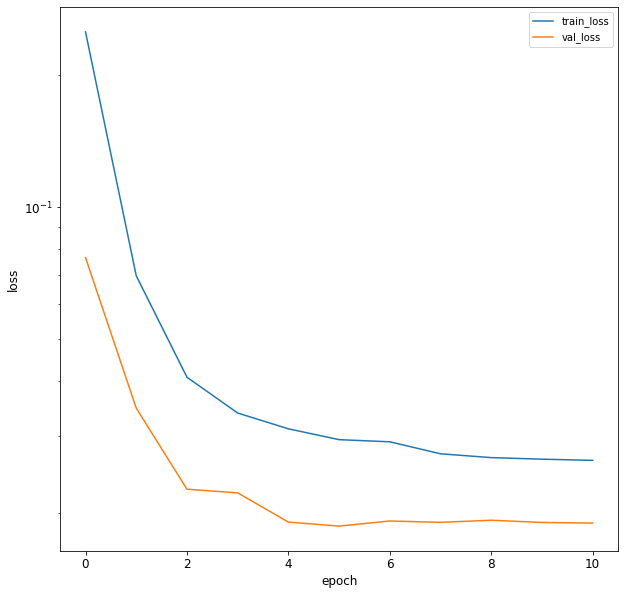

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5762][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5762,1636.0,6.562451,94.353337,1.0,3.0,0.0,1746.0,1855.0,1982.0,1510.0,1676.0,1659.0,1804.000000
5763,1613.0,6.022451,96.286280,1.0,3.0,0.0,1720.0,1849.0,1966.0,1492.0,1638.0,1616.0,1774.583333
5764,1601.0,6.022451,96.286280,2.0,3.0,0.0,1688.0,1851.0,1942.0,1469.0,1619.0,1607.0,1746.166667
5765,1569.0,6.022451,96.286280,2.0,3.0,0.0,1663.0,1797.0,1935.0,1422.0,1609.0,1600.0,1715.666667
5766,1577.0,5.842451,96.144815,2.0,3.0,0.0,1636.0,1746.0,1855.0,1465.0,1607.0,1558.0,1692.500000
5767,1570.0,5.662451,96.003350,2.0,3.0,0.0,1613.0,1720.0,1849.0,1445.0,1622.0,1576.0,1669.250000
5768,1562.0,5.662451,96.003350,3.0,3.0,0.0,1601.0,1688.0,1851.0,1432.0,1594.0,1568.0,1645.166667
5769,1549.0,5.662451,96.003350,3.0,3.0,0.0,1569.0,1663.0,1797.0,1431.0,1570.0,1554.0,1624.500000
5770,1528.0,5.467451,96.230240,3.0,3.0,0.0,1577.0,1636.0,1746.0,1406.0,1563.0,1518.0,1606.333333
5771,1519.0,5.272451,96.457130,3.0,3.0,0.0,1570.0,1613.0,1720.0,1388.0,1546.0,1505.0,1589.583333


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2878 entries, 5762 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2878 non-null   float64
 1   Temp    2878 non-null   float64
 2   Hum     2878 non-null   float64
 3   A       2878 non-null   float64
 4   B       2878 non-null   float64
 5   C       2878 non-null   float64
 6   D       2878 non-null   float64
 7   E       2878 non-null   float64
 8   F       2878 non-null   float64
 9   G       2878 non-null   float64
 10  H       2878 non-null   float64
 11  I       2878 non-null   float64
 12  J       2878 non-null   float64
dtypes: float64(13)
memory usage: 314.8 KB


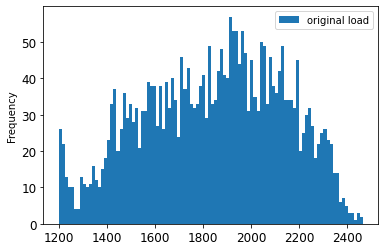

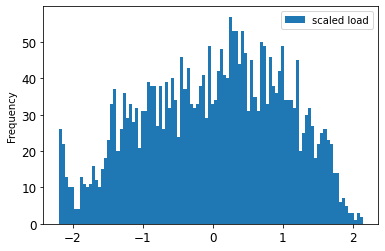

In [36]:
stlf_data[stlf_data.index >= 5762][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5762][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5762,-0.704350,-1.320854,1.080350,-1.663498,-0.498368,-1.415689,-0.326414,0.048071,0.484242,-1.133429,-0.555359,-0.624190,-0.132824,-0.783351
5763,-0.783351,-1.456662,1.185374,-1.663498,-0.498368,-1.415689,-0.415715,0.027463,0.429287,-1.195335,-0.686927,-0.773581,-0.238341,-0.824569
5764,-0.824569,-1.456662,1.185374,-1.518946,-0.498368,-1.415689,-0.525625,0.034332,0.346855,-1.274437,-0.752711,-0.804849,-0.340272,-0.934483
5765,-0.934483,-1.456662,1.185374,-1.518946,-0.498368,-1.415689,-0.611492,-0.151143,0.322812,-1.436079,-0.787335,-0.829168,-0.449675,-0.907004
5766,-0.907004,-1.501932,1.177688,-1.518946,-0.498368,-1.415689,-0.704229,-0.326314,0.048037,-1.288194,-0.794259,-0.975085,-0.532773,-0.931048
5767,-0.931048,-1.547201,1.170002,-1.518946,-0.498368,-1.415689,-0.783226,-0.415617,0.027429,-1.356978,-0.742324,-0.912549,-0.616171,-0.958527
5768,-0.958527,-1.547201,1.170002,-1.374395,-0.498368,-1.415689,-0.824442,-0.525529,0.034299,-1.401687,-0.839270,-0.940343,-0.702557,-1.003179
5769,-1.003179,-1.547201,1.170002,-1.374395,-0.498368,-1.415689,-0.934352,-0.611397,-0.151175,-1.405127,-0.922365,-0.988982,-0.776688,-1.075310
5770,-1.075310,-1.596243,1.182329,-1.374395,-0.498368,-1.415689,-0.906875,-0.704135,-0.326343,-1.491107,-0.946602,-1.114054,-0.841852,-1.106223
5771,-1.106223,-1.645285,1.194657,-1.374395,-0.498368,-1.415689,-0.930918,-0.783133,-0.415645,-1.553012,-1.005461,-1.159219,-0.901934,-1.271094


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5762,-0.704350,-1.320854,1.080350,-1.663498,-0.498368,-1.415689,-0.326414,0.048071,0.484242,-1.133429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.704350
5763,-0.783351,-1.456662,1.185374,-1.663498,-0.498368,-1.415689,-0.415715,0.027463,0.429287,-1.195335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.704350,-0.783351
5764,-0.824569,-1.456662,1.185374,-1.518946,-0.498368,-1.415689,-0.525625,0.034332,0.346855,-1.274437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.704350,-0.783351,-0.824569
5765,-0.934483,-1.456662,1.185374,-1.518946,-0.498368,-1.415689,-0.611492,-0.151143,0.322812,-1.436079,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.704350,-0.783351,-0.824569,-0.934483
5766,-0.907004,-1.501932,1.177688,-1.518946,-0.498368,-1.415689,-0.704229,-0.326314,0.048037,-1.288194,...,NaN,NaN,NaN,NaN,NaN,-0.704350,-0.783351,-0.824569,-0.934483,-0.907004
5767,-0.931048,-1.547201,1.170002,-1.518946,-0.498368,-1.415689,-0.783226,-0.415617,0.027429,-1.356978,...,NaN,NaN,NaN,NaN,-0.704350,-0.783351,-0.824569,-0.934483,-0.907004,-0.931048
5768,-0.958527,-1.547201,1.170002,-1.374395,-0.498368,-1.415689,-0.824442,-0.525529,0.034299,-1.401687,...,NaN,NaN,NaN,-0.704350,-0.783351,-0.824569,-0.934483,-0.907004,-0.931048,-0.958527
5769,-1.003179,-1.547201,1.170002,-1.374395,-0.498368,-1.415689,-0.934352,-0.611397,-0.151175,-1.405127,...,NaN,NaN,-0.704350,-0.783351,-0.824569,-0.934483,-0.907004,-0.931048,-0.958527,-1.003179
5770,-1.075310,-1.596243,1.182329,-1.374395,-0.498368,-1.415689,-0.906875,-0.704135,-0.326343,-1.491107,...,NaN,-0.704350,-0.783351,-0.824569,-0.934483,-0.907004,-0.931048,-0.958527,-1.003179,-1.075310
5771,-1.106223,-1.645285,1.194657,-1.374395,-0.498368,-1.415689,-0.930918,-0.783133,-0.415645,-1.553012,...,-0.70435,-0.783351,-0.824569,-0.934483,-0.907004,-0.931048,-0.958527,-1.003179,-1.075310,-1.106223


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5772,-1.271094,-1.645285,1.194657,-1.229843,-0.498368,-1.415689,-0.958395,-0.824350,-0.525555,-1.573648,...,-0.783351,-0.824569,-0.934483,-0.907004,-0.931048,-0.958527,-1.003179,-1.075310,-1.106223,-1.271094
5773,-1.219572,-1.645285,1.194657,-1.229843,-0.498368,-1.415689,-1.003046,-0.934261,-0.611422,-1.618357,...,-0.824569,-0.934483,-0.907004,-0.931048,-0.958527,-1.003179,-1.075310,-1.106223,-1.271094,-1.219572
5774,-1.233311,-1.657860,1.229582,-1.229843,-0.498368,-1.415689,-1.075174,-0.906784,-0.704159,-1.614918,...,-0.934483,-0.907004,-0.931048,-0.958527,-1.003179,-1.075310,-1.106223,-1.271094,-1.219572,-1.233311
5775,-1.257355,-1.670435,1.264506,-1.229843,-0.498368,-1.415689,-1.106086,-0.930827,-0.783157,-1.522060,...,-0.907004,-0.931048,-0.958527,-1.003179,-1.075310,-1.106223,-1.271094,-1.219572,-1.233311,-1.257355
5776,-1.229877,-1.670435,1.264506,-1.085292,-0.498368,-1.415689,-1.270951,-0.958305,-0.824373,-1.511742,...,-0.931048,-0.958527,-1.003179,-1.075310,-1.106223,-1.271094,-1.219572,-1.233311,-1.257355,-1.229877


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5772,-1.219572
5773,-1.233311
5774,-1.257355
5775,-1.229877
5776,-1.260790
...,...
8634,-0.185694
8635,-0.230347
8636,-0.323086
8637,-0.481088


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5772,-1.271094,-1.271094,-1.106223,-1.075310,-1.003179,-0.958527,-0.931048,-0.907004,-0.934483,-0.824569,...,-1.229843,-0.498368,-1.415689,-0.958395,-0.824350,-0.525555,-1.573648,-1.036622,-1.162693,-0.966798
5773,-1.219572,-1.219572,-1.271094,-1.106223,-1.075310,-1.003179,-0.958527,-0.931048,-0.907004,-0.934483,...,-1.229843,-0.498368,-1.415689,-1.003046,-0.934261,-0.611422,-1.618357,-1.182040,-1.121002,-1.019706
5774,-1.233311,-1.233311,-1.219572,-1.271094,-1.106223,-1.075310,-1.003179,-0.958527,-0.931048,-0.907004,...,-1.229843,-0.498368,-1.415689,-1.075174,-0.906784,-0.704159,-1.614918,-1.060859,-1.145322,-1.065739
5775,-1.257355,-1.257355,-1.233311,-1.219572,-1.271094,-1.106223,-1.075310,-1.003179,-0.958527,-0.931048,...,-1.229843,-0.498368,-1.415689,-1.106086,-0.930827,-0.783157,-1.522060,-1.047009,-1.121002,-1.106990
5776,-1.229877,-1.229877,-1.257355,-1.233311,-1.219572,-1.271094,-1.106223,-1.075310,-1.003179,-0.958527,...,-1.085292,-0.498368,-1.415689,-1.270951,-0.958305,-0.824373,-1.511742,-1.071246,-1.138373,-1.142262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8634,0.102830,0.102830,0.123439,0.216179,0.288310,0.466920,0.363876,0.367311,0.394789,0.490964,...,1.516636,0.016827,0.706370,0.466998,0.491151,0.892970,0.056536,0.133644,-0.599870,0.427642
8635,-0.185694,-0.185694,0.102830,0.123439,0.216179,0.288310,0.466920,0.363876,0.367311,0.394789,...,1.516636,0.016827,0.706370,0.288395,0.394979,0.793364,-0.026005,0.043624,-0.759684,0.342451
8636,-0.230347,-0.230347,-0.185694,0.102830,0.123439,0.216179,0.288310,0.466920,0.363876,0.367311,...,1.661188,0.016827,0.706370,0.216266,0.367501,0.704062,-0.160134,-0.067171,-0.874333,0.261146
8637,-0.323086,-0.323086,-0.230347,-0.185694,0.102830,0.123439,0.216179,0.288310,0.466920,0.363876,...,1.661188,0.016827,0.706370,0.123530,0.364066,0.601022,-0.376804,-0.226438,-0.961188,0.180738


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2867, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2867, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2867,2,1,12)

In [45]:
predictions = model.predict(X_test)
predictions

array([[-1.3176614 ],
       [-1.2533522 ],
       [-1.3034174 ],
       ...,
       [-0.39600143],
       [-0.5280827 ],
       [-0.6632594 ]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 6762][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1848.040469
dtype: float64
Cons    285.221892
dtype: float64


In [47]:
load_mean=1848.040469
load_std=285.221892
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
5772,1500.191795
5773,1496.273062
5774,1489.415278
5775,1497.252745
5776,1488.435595
...,...
8634,1795.076468
8635,1782.340585
8636,1755.889136
8637,1710.823704


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1472.2146],
       [1490.557 ],
       [1476.2773],
       ...,
       [1735.0923],
       [1697.4198],
       [1658.8644]], dtype=float32)

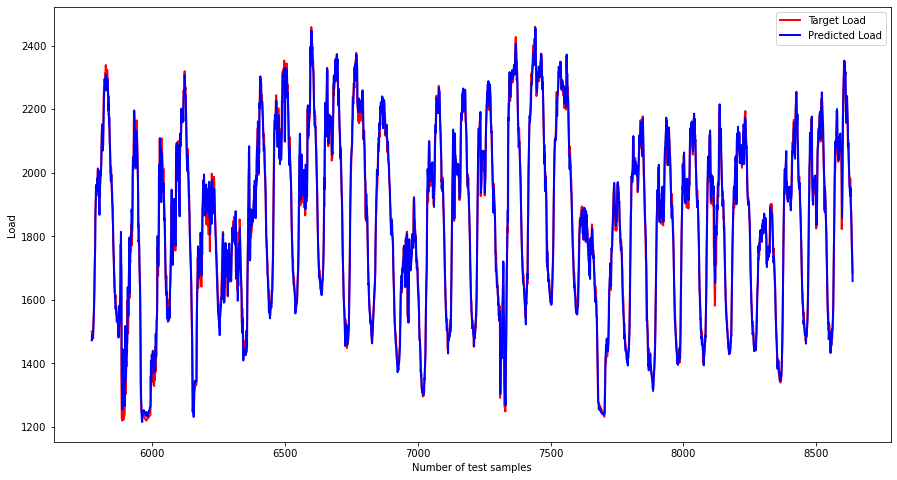

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.5283141151154211


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -0.008232
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5772  149921.044378
5773  149527.688170
5774  148842.409926
5775  149626.629668
5776  148743.647020
...             ...
8634  179405.732795
8635  178135.360721
8636  175490.098024
8637  170983.153912
8638  168436.765487

[2867 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5772   782.723445
5773    32.673281
5774   172.605327
5775   411.707905
5776     1.696606
...           ...
8634  1180.487568
8635   538.680045
8636   432.509013
8637   179.664657
8638   701.590763

[2867 rows x 1 columns]
y_t+1    1549.275354
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    39.360835
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2867):
    b=a[i]
    print(b)

[1472.2146]
[1490.557]
[1476.2773]
[1476.9622]
[1487.133]
[1481.6232]
[1502.314]
[1525.185]
[1555.608]
[1580.8958]
[1631.1467]
[1665.3303]
[1734.4182]
[1760.4751]
[1876.7354]
[1904.1123]
[1959.2799]
[1941.1736]
[1962.3485]
[1944.3267]
[1941.1604]
[1981.7523]
[1953.2849]
[2005.4114]
[2011.1492]
[1980.9562]
[1989.1073]
[1999.6434]
[1915.023]
[1867.2075]
[1965.4814]
[1924.6019]
[2005.4482]
[1991.0803]
[2003.7177]
[2010.8434]
[2034.511]
[2073.742]
[2112.6924]
[2151.855]
[2137.3564]
[2069.0774]
[2098.263]
[2085.6956]
[2136.5781]
[2193.914]
[2229.6104]
[2253.2078]
[2258.4946]
[2279.282]
[2260.2412]
[2295.749]
[2262.8167]
[2300.5159]
[2307.9502]
[2274.4646]
[2271.4797]
[2258.3953]
[2287.2217]
[2295.8672]
[2287.9985]
[2256.1824]
[2243.5598]
[2194.7842]
[2219.5369]
[2151.9822]
[2174.4001]
[2131.4614]
[2093.29]
[2075.4526]
[2024.9429]
[1991.9757]
[1972.6914]
[1984.3182]
[1994.2858]
[1971.5791]
[1944.3345]
[1905.5364]
[1903.3395]
[1853.6621]
[1836.6724]
[1779.4316]
[1752.7467]
[1726.7224]
[1677.2

[2180.8672]
[2138.4553]
[2092.821]
[2044.9305]
[2068.9321]
[2026.9454]
[2104.7292]
[2126.2803]
[2099.568]
[2040.0321]
[2045.057]
[2090.975]
[2121.336]
[2223.745]
[2221.3455]
[2286.778]
[2306.734]
[2280.6018]
[2294.3706]
[2313.7654]
[2313.825]
[2275.3613]
[2329.7192]
[2192.2378]
[2098.1538]
[2229.8782]
[2258.829]
[2328.0212]
[2301.6418]
[2315.3755]
[2295.2817]
[2323.0833]
[2293.725]
[2235.6108]
[2251.9575]
[2228.2756]
[2191.2542]
[2151.4492]
[2119.467]
[2048.73]
[2023.8389]
[2052.96]
[2078.8696]
[2045.8103]
[2023.8792]
[1986.4436]
[1974.3607]
[1952.3159]
[1890.449]
[1829.4497]
[1786.2067]
[1774.2452]
[1729.5068]
[1693.1965]
[1682.7041]
[1685.7622]
[1650.043]
[1644.198]
[1641.6654]
[1630.7698]
[1624.769]
[1615.0139]
[1601.4851]
[1557.2572]
[1568.4543]
[1575.3848]
[1574.592]
[1586.6147]
[1587.8577]
[1600.037]
[1603.5349]
[1659.0269]
[1677.5737]
[1691.5011]
[1728.5122]
[1760.6937]
[1874.1697]
[1968.2212]
[2050.7334]
[2081.635]
[2122.562]
[2085.5098]
[1984.3159]
[1914.9495]
[1924.5393]
[194

[2260.7817]
[2260.6143]
[2192.7344]
[2161.4404]
[2154.363]
[2124.5352]
[2096.5137]
[2036.0538]
[1988.8296]
[1982.5165]
[1951.5701]
[1951.1227]
[1984.0663]
[1933.7346]
[1934.2455]
[1901.8215]
[1857.7515]
[1836.9313]
[1800.1871]
[1769.2633]
[1695.1531]
[1664.5956]
[1614.8025]
[1594.1505]
[1563.1553]
[1558.8859]
[1540.3732]
[1510.7402]
[1516.1337]
[1508.925]
[1517.4753]
[1494.2103]
[1485.3423]
[1484.6844]
[1454.2191]
[1491.369]
[1478.6641]
[1492.2998]
[1492.3483]
[1513.6938]
[1533.3007]
[1550.2656]
[1547.7286]
[1593.0511]
[1629.5854]
[1719.8087]
[1810.9746]
[1887.0219]
[1987.4177]
[2051.681]
[2112.7258]
[2138.5942]
[2138.7593]
[2089.2412]
[2076.663]
[2083.3953]
[2166.4302]
[2164.5771]
[2191.129]
[2031.5814]
[1936.1292]
[1956.0276]
[1968.5183]
[2031.4198]
[2068.6248]
[2061.844]
[2047.3794]
[2044.4036]
[2068.8032]
[2066.1748]
[2067.943]
[2061.7239]
[2044.1807]
[2046.392]
[1980.9491]
[1936.3962]
[1969.3286]
[1985.4417]
[2068.9329]
[2140.4722]
[2166.0408]
[2187.5017]
[2224.108]
[2250.315]
[22

[1946.0634]
[1915.7308]
[1919.5671]
[1968.0522]
[2010.8287]
[2024.9224]
[1951.5695]
[1887.5494]
[1844.626]
[1880.2118]
[1860.6136]
[1901.1881]
[1877.4501]
[1858.7504]
[1913.1149]
[1865.7587]
[1934.6423]
[1916.1344]
[1955.7937]
[1955.9988]
[1940.7708]
[1909.2178]
[1845.6046]
[1866.4734]
[1868.2578]
[1915.8845]
[1994.0304]
[2051.4143]
[2077.8074]
[2075.8635]
[2093.6548]
[2118.5396]
[2138.4717]
[2173.2034]
[2145.0137]
[2164.2026]
[2122.2256]
[2096.0488]
[2045.5488]
[2023.8672]
[2130.8137]
[2138.6047]
[2142.6755]
[2118.9478]
[2106.037]
[2102.0674]
[2056.0017]
[2056.6418]
[2024.8999]
[1990.445]
[1968.5957]
[1938.6837]
[1900.9729]
[1857.4556]
[1858.7722]
[1898.4799]
[1866.1725]
[1848.817]
[1813.5598]
[1797.4583]
[1770.6687]
[1721.4707]
[1679.5691]
[1629.0044]
[1610.0392]
[1539.6682]
[1529.7549]
[1511.3428]
[1494.7825]
[1476.1888]
[1461.3782]
[1442.4762]
[1440.5183]
[1427.6147]
[1410.9442]
[1398.7987]
[1411.9817]
[1394.9802]
[1399.7402]
[1407.0057]
[1402.7014]
[1420.0642]
[1421.5146]
[1445.08